Student name: Vilohit Keshava Murthy Achar

Student id: 23077751

# Task: Deep neural networks

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Get the data an manipulate

We're going to use the Fashion MNIST dataset, which we can download from OpenML.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a set of 60,000 samples. Each sample is a 28x28 grayscale image, associated with a label from 10 classes.

Label IDs:
* T-shirt/top - 0
* Trouser - 1
* Pullover - 2
* Dress - 3
* Coat - 4
* Sandal - 5
* Shirt - 6
* Sneaker - 7
* Bag - 8
* Ankle boot - 9

We'll load up the Fashion-MNIST dataset. It will take a few seconds.


In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Let's also visualise a few random samples of this

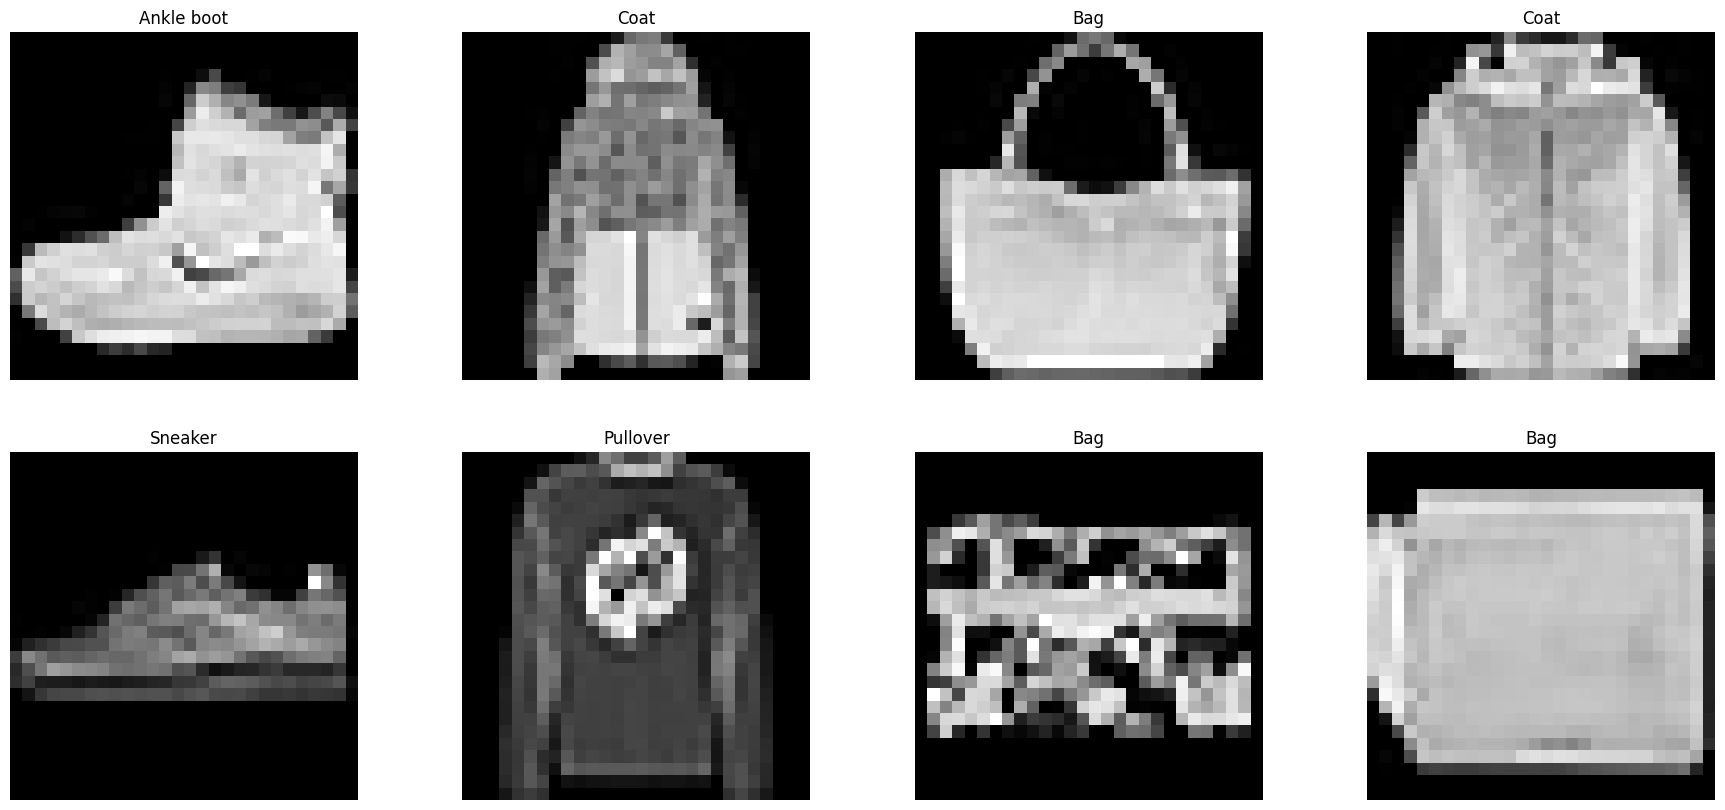

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = (0, 22, 100, 555, 666, 123, 10000, 55005)

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Visualize the image

fig, ax = plt.subplots(2, 4, figsize=(22, 10))
fig.subplots_adjust(wspace=0.3)
ax = ax.flatten()

for i in range(len(index)):
    ax[i].imshow(np.reshape(X[index[i]], (-1, 28)), cmap='gray', vmin=0, vmax=255)
    ax[i].axis('off')  # clear x-axis and y-axis
    ax[i].set_title(text_labels[int(y[index[i]])])

plt.show()

### Data manipulation

Firstly, do a train/test split. Keep 20% of the data for test. Fix the `random_state` so that the test is completely repeatible.

Then use the `StandardScaler` function from `sklearn.preprocessing`, as the multi-layer perceptron can be quite sensitive to data scaling.

<span style="color:red">Insert your code below</span>.

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

############################
# Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Task 1: Train a Perceptron

1. A single artifical neuron is a Perceptron, so use `sklearn`'s implementation of the Percpetron, and train it.
2. Calculate and print the accuracy
3. Discuss the result, does it seem good or bad?
4. Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the clothing item that was predicted?)
5. Multiclass perceptron? We learned that the Percpetron is a binary classifier. Give a brief description of how multi-class perceptron might work. Of course, use the internet, but give it to me in your own words, and use a diagram as appropriate.

<span style="color:red">Insert your code below</span>.

In [6]:
from sklearn.linear_model import Perceptron as Perceptron
from sklearn.metrics import accuracy_score
##################
# Your code here
model = Perceptron(random_state=42)
model.fit(X_train_scaled, y_train)

per_y_pred = model.predict(X_test_scaled)
pecetp_accuracy = accuracy_score(y_test, per_y_pred)
print("Accuracy on test set: ",pecetp_accuracy)

Accuracy on test set:  0.8165714285714286


In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix

##################
# Your code here
pecetp_accuracy = accuracy_score(y_test, per_y_pred)
confusion_mat = confusion_matrix(y_test, per_y_pred)
print("Accuracy on test set: ",pecetp_accuracy)
print("Accuracy on test set: \n",confusion_mat)

Accuracy on test set:  0.8165714285714286
Accuracy on test set: 
 [[1099   10   73   54   21    7  105    2   23    0]
 [   4 1349   16   11    7    1    7    3    4    0]
 [  48    3 1084   12  186    4   50    2   18    0]
 [  49   67   48 1131   74    4   55    6   15    0]
 [  32    5  182   34  992    1   88    1   22    0]
 [   2    0    2    2    0 1276    0  116    9   42]
 [ 260    6  218   41  214    4  619    3   40    2]
 [   0    0    0    0    0   30    0 1279    1   49]
 [  15    4   10   12    1    5   22   21 1250    2]
 [   0    0    0    1    0   17    0   58    5 1353]]


### Discuss the result, does it seem good or bad?

With an accuracy of about 81.66%, the Perceptron model performed admirably, accurately predicting the target variable for about 81.66% of the test dataset. This degree of accuracy, which shows a significant capacity for prediction, can be regarded as promising.


Nevertheless, the evaluation of the model's effectiveness depends on the particular requirements of the issue domain. It is advisable to compare this result with other models or include additional metrics like precision, recall, or the F1-score in order to fully assess its performance.

Not with standing this encouraging result, more improvement of the model's predictive power could be achieved by investigating various methods, feature engineering, and hyperparameter tuning. Furthermore, considering the background and practical ramifications, further refinements and enhancements may be required to guarantee its applicability.

Furthermore, it may require ongoing revisions and enhancements given the situation and practical implications to guarantee its applicability and dependability in solving the current issue.

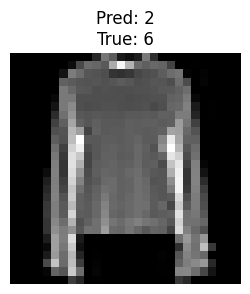

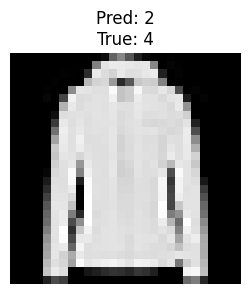

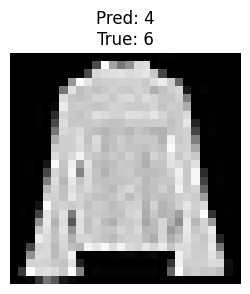

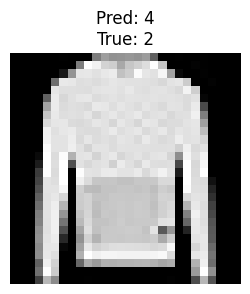

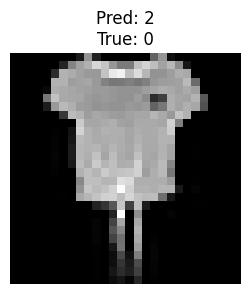

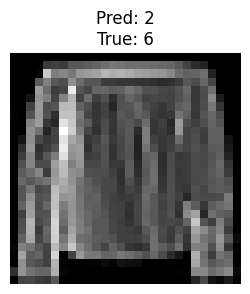

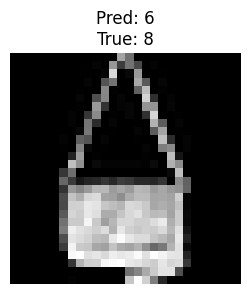

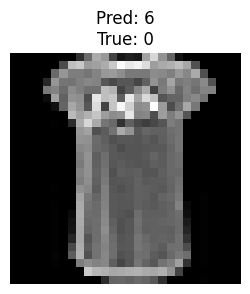

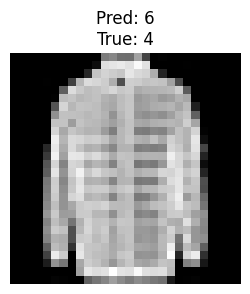

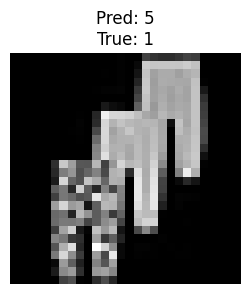

In [8]:
import matplotlib.pyplot as plt
import numpy as np

incorrect_indices = np.where(per_y_pred != y_test)[0]
per_y_pred_array = np.array(per_y_pred)
y_test_array = np.array(y_test)

incorrect_indices = np.nonzero(per_y_pred_array != y_test_array)[0]
incorrect_images = X_test[incorrect_indices]


for i, idx in enumerate(incorrect_indices[:10]):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.imshow(incorrect_images[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {per_y_pred[idx]}\nTrue: {y_test[idx]}")
    ax.axis('off')  # Hide the axes
    plt.show()


The multiclass perceptron model is an advanced version of the basic perceptron, designed to handle tasks involving multiple classes, as opposed to the binary classification for which the original perceptron model is known. This model operates by implementing a few key principles:

### 1. **Individual Perceptrons for Each Class**
   - **Structure**: For a problem with \( N \) classes, the model consists of \( N \) perceptrons, with each perceptron being responsible for identifying a specific class.
   - **Role of Each Perceptron**: The main function of each perceptron is to differentiate its assigned class from all others, effectively becoming a specialist in recognizing patterns associated with that class.

### 2. **Process of Training**
   - **Adjusting to Patterns**: During training, the perceptrons adjust their weights based on the training data, learning to identify their respective classes.
   - **Expected Outputs**: A perceptron aims to output a high score (near 1) for inputs from its class and a low score (near 0) for inputs from other classes.

### 3. **Mechanism for Making Predictions**
   - **Scoring System**: Each perceptron assigns a score to a new input, reflecting its likelihood of belonging to the perceptron's class.
   - **Determining the Class**: The class of the input is decided based on these scores, with the class corresponding to the perceptron with the highest score being chosen. This setup essentially creates a competitive scenario among the perceptrons.

### 4. **Dealing with Complex Class Boundaries**
   - **Beyond Linear Models**: Basic perceptrons are linear models and might not perform well with non-linear class separations.
   - **Enhancement Techniques**: To address this, the multiclass perceptron can be combined with more sophisticated approaches like kernel methods or integrated into neural network frameworks, enabling it to manage more intricate, non-linear classifications.


   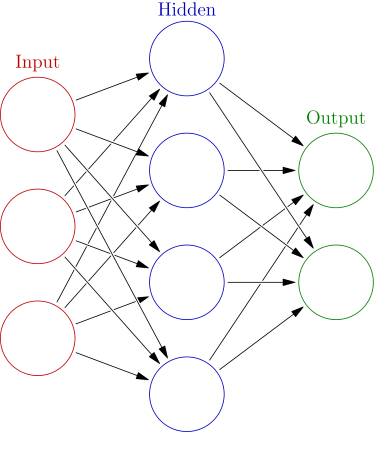

<font color='red'>Enter your text here</font>

The accuracy is not too bad for a simple linear classifier. However, as with all of these types of problems, most of the effort will go into gaining small, but important imporvements. Let's see if we can make it better.

## Task 2: Train a multi-layer Perceptron with one hidden layer (of width 20)

Let's try going wide first

* Set the regularizing parameter to 0.1 (alpha = 0.1). We have looked at regularisation before in the context of machine learning algorithms. It is important, but we won't investigate it further here. We'll leave this fixed.
* Set verbose = 1, so we can look at what is happenign on each epoch (iteration)
* Set random_state=1 (or some constant), so the test is repeatible
* For the moment, set hidden_layer_sizes to (20,).

This tuple then sets the number of hidden layers. The number of values in the tuple is the number of layers, and the number of each value is the number of nodes in that layer. So a tuple of (50,30,10) would be one layer with 50 nodes, connect to a second hidden layer with 30 nodes and a final hidden layer with 10 nodes). But for the moment, just go for one hidden layer with 20 nodes.

Also print the __training and accuracy score__ of our current network (remember the `accuracy_score` function from `sklearn.metrics`?). The score on the test dataset should not be too bad at this point. That's quite impressive for a first stab at a neural network. Let's see if we can do better, though!

<span style="color:red">Insert your code below</span>.

In [9]:
from sklearn.neural_network import MLPClassifier

#######################
# Your code here

perceptron_mlp = MLPClassifier(random_state=42,hidden_layer_sizes=(20,),verbose=1,alpha=0.1)
perceptron_mlp.fit(X_train_scaled,y_train)
per_y_pred = perceptron_mlp.predict(X_test_scaled)

print("accuracy score for layer size (20,) is ", accuracy_score(per_y_pred, y_test))
print("Confusion matrix layer size (20,) is \n",confusion_matrix(per_y_pred, y_test))

Iteration 1, loss = 0.65226459
Iteration 2, loss = 0.43831608
Iteration 3, loss = 0.40226257
Iteration 4, loss = 0.38179829
Iteration 5, loss = 0.36728105
Iteration 6, loss = 0.35776215
Iteration 7, loss = 0.34954336
Iteration 8, loss = 0.34104124
Iteration 9, loss = 0.33694452
Iteration 10, loss = 0.33222178
Iteration 11, loss = 0.32780911
Iteration 12, loss = 0.32387997
Iteration 13, loss = 0.31965706
Iteration 14, loss = 0.31811203
Iteration 15, loss = 0.31457335
Iteration 16, loss = 0.31268883
Iteration 17, loss = 0.31055972
Iteration 18, loss = 0.30676419
Iteration 19, loss = 0.30477562
Iteration 20, loss = 0.30436365
Iteration 21, loss = 0.30079397
Iteration 22, loss = 0.29982949
Iteration 23, loss = 0.29793866
Iteration 24, loss = 0.29666269
Iteration 25, loss = 0.29636652
Iteration 26, loss = 0.29343013
Iteration 27, loss = 0.29297305
Iteration 28, loss = 0.29330393
Iteration 29, loss = 0.29037594
Iteration 30, loss = 0.28942154
Iteration 31, loss = 0.28910554
Iteration 32, los

#### Questions: (answer here)

1. What is the size of the input layer here? Explain
2. What is the size of the output layer here? Explain
3. How many weights in total does the algorithm learn?
4. What does it mean that the training accuracy and the test accuracy are different?

### 1. What is the size of the input layer here? Explain

In [10]:
np.size(X_train[0])

784

For configuring the input layer of a multilayer perceptron (MLP), the crucial aspect to consider is the quantity of features present in the dataset. In an MLP, every feature corresponds to a single neuron in the input layer. Given that the dataset contains 784 features, this implies that the input layer of the MLP will be comprised of 784 neurons.

### 2. What is the size of the output layer here? Explain

The size of the output layer in a Multilayer Perceptron (MLP) used for classification tasks is directly linked to the number of classes that the model aims to identify. Each class is represented by a neuron in the output layer. For instance, if there are 10 classes, the output layer will consist of 10 neurons. Similarly, for a scenario with 100 classes, the output layer will have 100 neurons.

In our specific case, the MLP is dealing with 10 unique classes. This means that the MLP's output layer should have 10 neurons, with each neuron representing one of the classes. To determine this size, we can calculate the length of `text_labels`, which should correspond to the number of classes, thus defining the number of neurons in the output layer.

In [12]:
np.size(text_labels)

10

### 3. How many weights in total does the algorithm learn?

In a multilayer perceptron (MLP) with 784 neurons in the input layer, 20 in the hidden layer, and 10 in the output layer, we can determine the total count of weights by analyzing the connections between each layer:

### Calculation of Total Weights:

#### A. **Weights Between the Input and Hidden Layer:**
- **Computation**: The number of weights is the product of the neurons in the input layer and the hidden layer.
- **Formula**: ( 784 { (input neurons)} times 20 { (hidden neurons)} )
- **Result**: This equals 15,680 weights.

#### B. **Weights Between the Hidden and Output Layer:**
- **Computation**: Similarly, every neuron in the output layer is connected to each neuron in the hidden layer.
- **Formula**: ( 20 { (hidden neurons)} times 10 { (output neurons)} )
- **Result**: This results in 200 weights.

#### C. **Total Number of Weights in the Network:**
- **Summation**: The total weight count is the sum of weights from both layers.
- **Total**: ( 15,680 + 200 ) equals 15,880 weights.

This approach helps in understanding the complexity and the learning capacity of the MLP based on its architecture.

### 4. What does it mean that the training accuracy and the test accuracy are different?

- If a machine learning model shows higher accuracy on its training data compared to its test data, this typically points to overfitting. Overfitting arises when the model becomes excessively attuned to the specific details and noise in the training dataset, hindering its performance on new, unseen data. Essentially, the model excels in the training environment but struggles to apply its learnings effectively to unfamiliar data. This issue is often observed in complex models with an abundance of parameters compared to the volume of available data.

- Conversely, when a model's training accuracy is either lower than or similar to its test accuracy, this may be a sign of underfitting. Underfitting is the result of a model being too simplistic, failing to capture the essential patterns within the training data, leading to subpar performance on both the training and test data. Causes of underfitting include a lack of model complexity or insufficiently developed features in the data. The optimal outcome is achieving high and closely matched accuracies in both training and testing, which suggests that the model has effectively learned the general patterns in the data and is capable of accurately generalizing to new datasets.

<font color='red'>Enter your text here</font>

#### Wider, wider, wider

Let's go wider. We have quite a lot of input features, and somehow it might seem that if we immediately connect this to a layer with only 20 neurons that something might be lost?

Let's see if more features help!

Iterate over a wider number of neurons, and plot the train accuracy and test accuracy as a graph. For example, iterate over a set of widths of `(20, 50, 100, 200)`, or something similar.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

<font color='red'>Enter your code here</font>

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

########################
# Your classifier training code here

a_test = []
a_train = []

widths = (20, 50, 100, 200)

max_test_accuracy = 0
confusion_mat = None

for i in range(len(widths)):
    perceptron_mlp = MLPClassifier(alpha=0.1, hidden_layer_sizes= widths[i], random_state=42)
    perceptron_mlp.fit(X_train_scaled, y_train)
    per_y_pred = perceptron_mlp.predict(X_test_scaled)

    test_accuracy = perceptron_mlp.score(X_test_scaled, y_test)
    a_test.append(test_accuracy)
    train_accuracy = perceptron_mlp.score(X_train_scaled, y_train)
    a_train.append(train_accuracy)

    if(test_accuracy > max_test_accuracy):
        max_test_accuracy = test_accuracy
        confusion_mat = confusion_matrix(y_test, per_y_pred)
    print(f"Completed for width {widths[i]}")

Completed for width 20
Completed for width 50
Completed for width 100
Completed for width 200


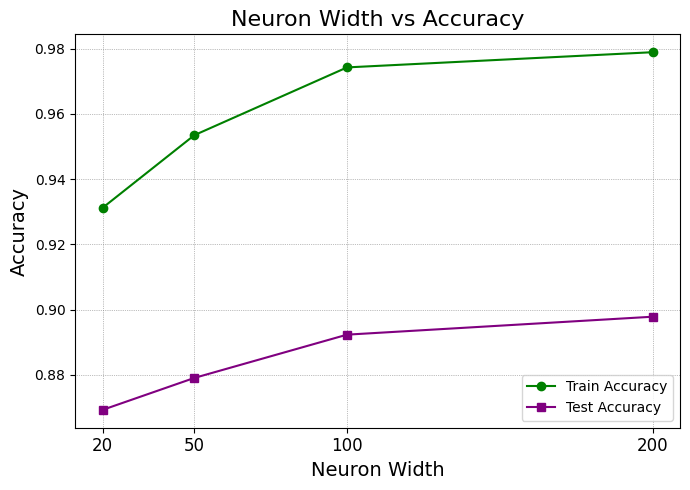

In [15]:
import matplotlib.pyplot as plt

########################
# Your plot of training and test accuracy here
plt.figure(figsize=(7, 5))
plt.plot(widths, a_train, color='green', linestyle='solid', marker='o', markersize=6, label='Train Accuracy')
plt.plot(widths, a_test, color='purple', linestyle='solid', marker='s', markersize=6, label='Test Accuracy')

plt.title('Neuron Width vs Accuracy', fontsize=16)
plt.xlabel('Neuron Width', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

plt.xticks(widths, fontsize=12)
plt.grid(True, linestyle=':', color='gray', linewidth=0.5)
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

Questions:

1. When you trained for all the different widths, did you notice anything about how long each training took? Discuss this.

2. What can you infer from the graph?

For the second question, think about the following:
* For the number of neurons you have tested, what is the best? (Highest performance -vs- lowest number of neurons)
* How many weights are learned by the algorithm for our optimal solution?
* Is there any evidence of overfitting occuring? Discuss this. What could we do to reduce this, if it is evident? (No need to implement anything to address tyhe overfitting, just comment)
(Hint: a large divergence between training accuracy and testing accuracy can indicate over-fitting).

<font color='red'>Enter your text here</font>

### When you trained for all the different widths, did you notice anything about how long each training took? Discuss this.

- As the number of neurons expands from 20 to 50, there's a slight uptick in the time it takes to train the model. However, with the difference being just about one minute, this impact on training time seems to be of minor significance at this stage.

- When the count of neurons further increases from 50 to 100, there's a notable escalation in training duration, nearly doubling it. This substantial increase indicates that the relationship between the number of neurons and training time doesn't follow a straightforward linear pattern.

- Further incrementing the neuron count from 100 to 200 leads to an additional increase in training time, approximately by 50 seconds. This observation reinforces the trend that an increase in the number of neurons tends to result in longer training periods.

The extended training durations associated with wider neural networks can be linked to the increased number of parameters, including weights and biases, that require updating in each training iteration. With more neurons in the network, the number of inter-neuronal connections rises, leading to a more complex optimization challenge for the training process. This complexity is further amplified during backpropagation, where the computation of gradients becomes more intricate. Additionally, the process of finding the minimum of the loss function becomes lengthier, and the memory requirements grow, all of which contribute to prolonged training times.

These findings underscore the criticality of making thoughtful decisions regarding model architecture. Larger models, while potentially more powerful, demand more computational power and time. This becomes particularly significant when working with extensive datasets or under resource constraints. Striking a balance between model complexity and computational efficiency is essential, not just for efficient training but also for practical application, especially in settings where time and resources are factors to consider.

### What can you infer from the graph?

Analyzing the graph, 50 neurons appear to be the ideal number for balancing high test accuracy with manageable complexity. In a network with an input size of 784 and 10 output classes, a single hidden layer comprising 50 neurons is estimated to learn around 39,760 parameters, including both weights and biases.

The increasing discrepancy between training and test accuracies as the number of neurons grows points to overfitting. While training accuracy improves with more neurons, test accuracy reaches a plateau, indicating that the model might be learning noise or irrelevant aspects of the training data rather than generalizable features.

To counter overfitting, various methods can be employed, such as regularization, introducing dropout, augmenting the data, applying early stopping, or simplifying the model's complexity. These strategies are designed to enhance the model's ability to generalize effectively to new, unseen data, ensuring a more robust performance in real-world applications.

## Task 3: The deeper the better!

Previously, we only had a single hidden layer, and we went as wide as a couple of hundred neurons. That is a lot of neurons and a lot of computation. Can we do better with fewer neurons by going deeper and using more layers? Now we're going to start playing with different configurations.

Rerun the above loop, but let's use a set of deeper networks. These are going to be simply designed. I suggest to use something like:
`layers = ((20,20),(20,20,20),(50,20),(100,100,50))`

Plot the train and test accuracy as a graph.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

**Note**: you might be feeling at this point that picking the neural network architecture is kind of random. At the moment, it is, to be honest. How many neurons per layer should I use? How many layers? And then I have to pick the training parameters on top of this?? These are all called hyperparameters of the network, and there is a lot of skill to develop to develop to be able to design networks efficiently and pick the right training parameters.

<font color='red'>Enter your code here</font>

In [ ]:
########################
# Your classifier training code here

layers = ((20,20),(20,20,20),(50,20),(100,100,50))

a_test = []
a_train = []

max_test_accuracy = 0
confusion_mat = None

for i in range(len(layers)):
    perceptron_mlp = MLPClassifier(alpha=0.1, hidden_layer_sizes= layers[i], random_state=42)
    perceptron_mlp.fit(X_train_scaled, y_train)
    per_y_pred = perceptron_mlp.predict(X_test_scaled)

    test_accuracy = perceptron_mlp.score(X_test_scaled, y_test)
    a_test.append(test_accuracy)
    train_accuracy = perceptron_mlp.score(X_train_scaled, y_train)
    a_train.append(train_accuracy)

    max_test_accuracy, confusion_mat = (test_accuracy, confusion_matrix(y_test, per_y_pred)) if test_accuracy > max_test_accuracy else (max_test_accuracy, confusion_mat)
    print(f"Completed for {layers[i]}")

Completed for (20, 20)
Completed for (20, 20, 20)
Completed for (50, 20)
Completed for (100, 100, 50)


In [ ]:
new_layers = list(map(str, layers))

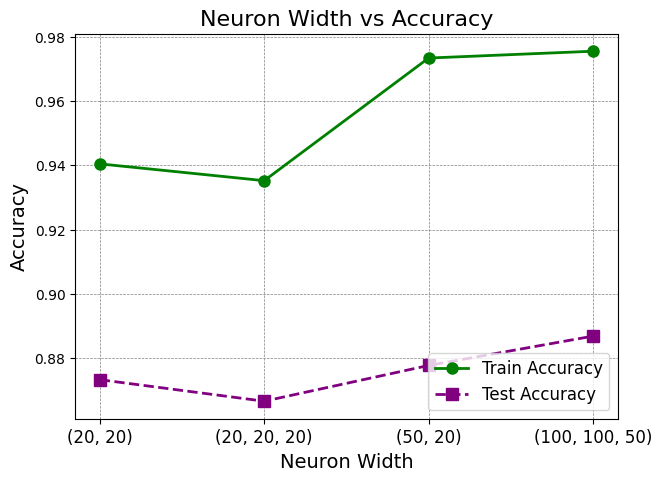

In [ ]:
import matplotlib.pyplot as plt

########################
# Your visualisation code here
plt.figure(figsize=(7, 5))

plt.plot(new_layers, a_train, 'o-', color='green', label='Train Accuracy', linewidth=2, markersize=8)
plt.plot(new_layers, a_test, 's--', color='purple', label='Test Accuracy', linewidth=2, markersize=8)

plt.title('Neuron Width vs Accuracy', fontsize=16)
plt.xlabel('Neuron Width', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(new_layers, fontsize=12)
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.legend(loc='lower right', fontsize=12)

plt.show()


#### Questions

What can you infer from the graph? (answer in the text box here).


 Think about the following:
* Do I have a deeper network that has fewer neurons but is doing better than my very wide network?
* How many weights did I need to train?

## Ans:-

The graph illustrates how the accuracy of a machine learning model on both training and test datasets is influenced by the model's complexity, represented by the 'neuron width' or the size of the hidden layers in the neural network.

Two main insights emerge from the graph:

### 1. **Rise in Training Accuracy with Greater Model Complexity:**
   - **Observation**: As the neuron count in the network's layers increases, symbolizing more complex models, there is a consistent rise in training accuracy (depicted by the blue line).
   - **Implication**: This trend indicates that the model fits the training data more effectively as it becomes more complex, capturing finer details and potentially even the noise within the data.

### 2. **No Increase in Test Accuracy Beyond a Certain Complexity Level:**
   - **Trend**: While the test accuracy (shown by the orange line) initially improves as the model complexity increases, it eventually reaches a plateau.
   - **Significance**: This suggests that after a certain level of complexity, the benefits of additional neurons do not enhance the model's ability to generalize to unseen data. Such a pattern is indicative of overfitting, where the model excels in learning the training data but fails to show similar improvement on new data, likely due to it capturing noise or overly intricate patterns that are not relevant to the test set.

These observations underscore the necessity of finding an optimal balance in model size. A model that is too simple may not fully capture the underlying patterns (leading to underfitting), whereas an overly complex model might fail to generalize effectively (resulting in overfitting).

# A.

According to the graph analysis, in terms of test accuracy, the larger network design (100, 100, 50) performs better than the deeper but narrower one (20, 20, 20). This suggests that the broader network generalizes to the test data more successfully in this instance.



# B.

Calculating the total number of trainable weights in a neural network involves summing up the weights of all connections between layers, where each connection between a neuron in one layer and a neuron in the next layer counts as a single weight. The calculations for various configurations are as follows:

1. (20, 20) Configuration:
Input to First Hidden Layer:
784
×
20
=
15
,
680
784×20=15,680 weights.
Within Hidden Layers:
20
×
20
=
400
20×20=400 weights.
Last Hidden Layer to Output Layer:
20
×
10
=
200
20×10=200 weights.
Total:
15
,
680
+
400
+
200
=
16
,
280
15,680+400+200=16,280 weights.
2. (20, 20, 20) Configuration:
Additional Weights between Second and Third Hidden Layers:
20
×
20
=
400
20×20=400 weights.
Total:
16
,
280
+
400
=
16
,
680
16,280+400=16,680 weights.
3. (50, 20) Configuration:
Input to First Hidden Layer:
784
×
50
=
39
,
200
784×50=39,200 weights.
First to Second Hidden Layer:
50
×
20
=
1
,
000
50×20=1,000 weights.
Total:
39
,
200
+
1
,
000
+
200
=
40
,
400
39,200+1,000+200=40,400 weights.
4. (100, 100, 50) Configuration:
Input to First Hidden Layer:
784
×
100
=
78
,
400
784×100=78,400 weights.
Within Hidden Layers:
100
×
100
+
100
×
50
=
15
,
000
100×100+100×50=15,000 weights.
Total:
78
,
400
+
15
,
000
+
500
=
93
,
900
78,400+15,000+500=93,900 weights.
These calculations provide insight into the complexity and learning capacity of the neural network based on the various configurations of its layers.







## Task 4: Confusion matrix

A [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) is a powerful way to visualise errors in your trained network. Plot a confusion matrix for your best model above (of course, plot using the test data).

Describe what you see in the confusion matrix.

<font color='red'>Enter your code here</font>

The confusion matrix presented here serves as a visual representation of the performance of a classification model. It is structured as a grid, where the actual classes of the data are represented by the rows and the predictions made by the model are denoted by the columns. A key feature of this matrix is the numbers along its diagonal; these are generally higher compared to other entries in the same row and column, signifying accurate predictions for each class.

Errors made by the model are indicated by the numbers off the diagonal. These figures reveal the instances of misclassification, highlighting that certain classes are more susceptible to being incorrectly identified than others. The color scheme of the matrix aids in interpreting these results, with darker colors indicating a higher frequency of occurrences. This aspect of the visualization makes it easier to spot which classes are most often confused by the model.

In summary, the confusion matrix not only provides insights into the overall accuracy of the model but also uncovers specific patterns of misclassification. These patterns are critical for understanding the model's limitations and identifying opportunities for improvement. By analyzing the matrix, one can pinpoint which classes the model struggles with and potentially investigate the reasons behind these inaccuracies, leading to targeted enhancements in the model's training or structure to boost its overall performance.

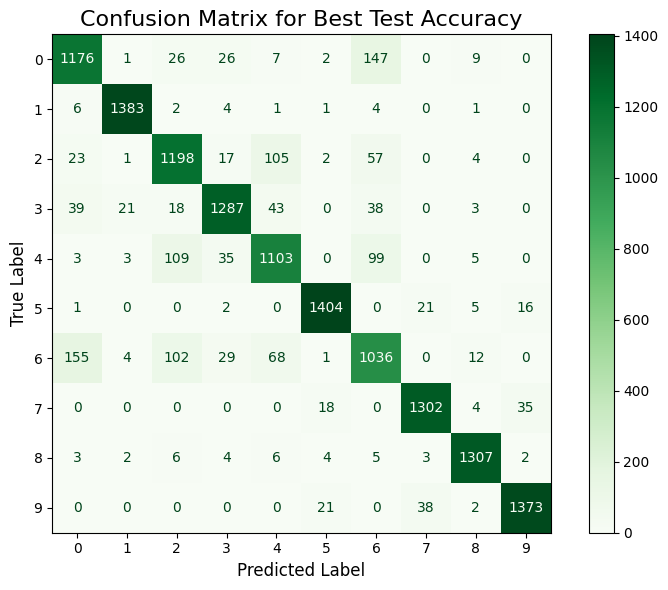

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
plot_matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)

fig, ax = plt.subplots(figsize=(8, 6))
plot_matrix.plot(ax=ax, cmap='Greens')

ax.set_title('Confusion Matrix for Best Test Accuracy', fontsize=16)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)

plt.tight_layout()
plt.show()